In [1]:
%reload_ext autoreload
%autoreload 2

# Static potential

In [2]:

#!/usr/bin/env python
# -*- coding:utf-8 -*-
#
# Created: 06/2023
# Author: Carmelo Mordini <cmordini@phys.ethz.ch>


import numpy as np
from pytrans import objectives as obj
from pytrans.conversion import freq_to_curv
from pytrans.ions import Ca40
from pytrans.functions import zpspace
from pytrans.solver import solver, init_waveform

from models.segmented_trap import SegmentedTrap

from pathlib import Path
data_dir = Path('.').resolve() / 'data'

trap = SegmentedTrap()

axial = freq_to_curv(1e6, ion=Ca40)
rtilt = 8e7

n_samples = 1
r0 = (0, 0, trap.z0)
ion = Ca40

waveform = init_waveform(n_samples, trap.n_electrodes)

objectives = [
    obj.GradientObjective(waveform[0], trap, *r0, value=0, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='xx', value=axial, ion=Ca40, pseudo=False),
]


objectives += [
    obj.VoltageObjective(waveform, 0),  # minimize voltages
    obj.VoltageObjective(waveform, 10, constraint_type='<='),
    obj.VoltageObjective(waveform, -10, constraint_type='>='),
]

_ = solver(objectives, verbose=True)
waveform = waveform.value  # get array from cvxpy variable

savename = data_dir / 'waveform_static_segmented_trap.npy'
print(f"Saving waveform as ndarray to {savename}")
np.save(savename, waveform)


Compiling objectives: 100%|██████████| 5/5 [00:00<00:00, 555.51it/s]

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Jun 21 05:37:14 PM: Your problem has 6 variables, 2 constraints, and 0 parameters.
(CVXPY) Jun 21 05:37:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 21 05:37:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 21 05:37:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 21 05:37:14 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 21 05:37:14 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(CVXPY) Jun 21 05:37:14 PM: Finished problem compilation (took 2.500e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jun 21 05:37:14 PM: Invoking solver MOSEK  to obtain a solution.


(CVXPY) Jun 21 05:37:14 PM: Problem
(CVXPY) Jun 21 05:37:14 PM:   Name                   :                 
(CVXPY) Jun 21 05:37:14 PM:   Objective sense        : max             
(CVXPY) Jun 21 05:37:14 PM:   Type                   : CONIC (conic optimization problem)
(CVXPY) Jun 21 05:37:14 PM:   Constraints            : 9               
(CVXPY) Jun 21 05:37:14 PM:   Cones                  : 3               
(CVXPY) Jun 21 05:37:14 PM:   Scalar variables       : 28              
(CVXPY) Jun 21 05:37:14 PM:   Matrix variables       : 0               
(CVXPY) Jun 21 05:37:14 PM:   Integer variab

## Analysis

Exec minimize
- minimize elapsed time: 6.747 ms
--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[0. 0. 0.]
Gradient [V/m]
[0.     0.0006 0.0008]
Displacement at 1 MHz [um]
[0. 0. 0.]
Hessian [V/m2]
[[ 1.6352e+07 -4.8430e+04  3.3513e+04]
 [-4.8430e+04  1.1654e+08  2.7342e+07]
 [ 3.3513e+04  2.7342e+07  1.4466e+08]]
Normal mode frequencies [MHz]
[1.00003 2.47123 3.14128]
Eigenvectors
[[1 0.000589 -0.000387]
 [0.000704 -0.854 0.521]
 [2.33e-05 0.521 0.854]]
Tilt angle of mode 2 (3.14): 58.61°



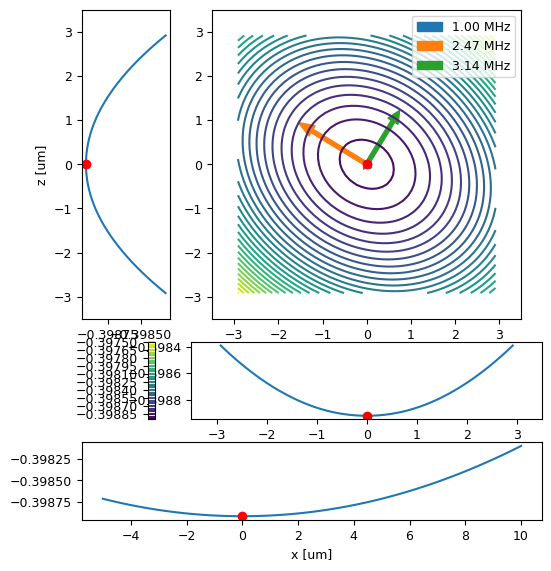

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from models.segmented_trap import SegmentedTrap
from models.segmented_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

trap = SegmentedTrap()
waveform = np.load(data_dir / 'waveform_static_segmented_trap.npy')

r0 = (0, 0, trap.z0)
roi = ((-5e-6, 10e-6), 3.5e-6, 3.5e-6)
res = analyse_potential(trap, voltages=waveform[0], ions=Ca40, r0=r0, roi=roi, verbose=True)


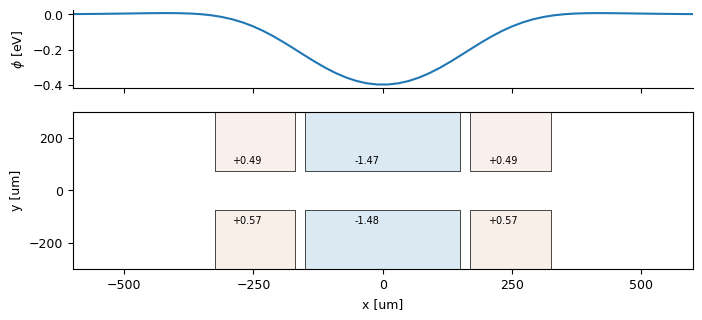

In [4]:
_ = plot_voltages_on_trap(trap, waveform[0])
